In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=960223c3125812ad143bd8039296ff97


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | kamenka
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | vestmanna
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | birao
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | channel-port aux basques
Processing Record 12 of Set 1 | qasigiannguit
Processing Record 13 of Set 1 | awbari
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | gamba
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | teahupoo
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | ya

Processing Record 37 of Set 4 | nizhnetroitskiy
Processing Record 38 of Set 4 | tilichiki
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | bilma
Processing Record 41 of Set 4 | kiama
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | le port
Processing Record 50 of Set 4 | meadow lake
Processing Record 1 of Set 5 | astoria
Processing Record 2 of Set 5 | abeche
Processing Record 3 of Set 5 | lima
Processing Record 4 of Set 5 | pinheiro
Processing Record 5 of Set 5 | pietarsaari
Processing Record 6 of Set 5 | warrington
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | bredasdorp
Processing Record 9 of Set 5 | san cristobal
Processing Rec

Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | henties bay
Processing Record 29 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 8 | rivers
Processing Record 31 of Set 8 | labutta
City not found. Skipping...
Processing Record 32 of Set 8 | nara
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | hay river
Processing Record 36 of Set 8 | lake lucerne
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | yagodnoye
Processing Record 39 of Set 8 | dwarka
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | maungatapere
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | oistins
Processing Record 44 of Set 8 | grand centre
City not found. Skipping...
Processing Record 45 of Set 8 | tsagan aman
Processing Record 46 of Set 8 | winnemucca
Processing Record 47 of Set 8 | gimbi
Processing Record 48 of Se

Processing Record 14 of Set 12 | bahia honda
Processing Record 15 of Set 12 | te anau
Processing Record 16 of Set 12 | talkha
Processing Record 17 of Set 12 | nuuk
Processing Record 18 of Set 12 | jasper
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | jumla
Processing Record 21 of Set 12 | chabahar
Processing Record 22 of Set 12 | marcona
City not found. Skipping...
Processing Record 23 of Set 12 | udachnyy
Processing Record 24 of Set 12 | tazovskiy
Processing Record 25 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 26 of Set 12 | talcahuano
Processing Record 27 of Set 12 | onega
Processing Record 28 of Set 12 | pochutla
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | tumbes
Processing Record 31 of Set 12 | ampanihy
Processing Record 32 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 33 of Set 12 | dawlatabad
Processing Record 34 of Set 12 | stephenville
Processing Record 35 of Set 12 | potsdam

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,78.55,72,0,17.43,PF,2020-09-30 00:47:55
1,Kamenka,51.32,42.77,50.00,47,100,11.97,RU,2020-09-30 00:55:05
2,Rikitea,-23.12,-134.97,70.25,79,71,21.85,PF,2020-09-30 00:50:48
3,Ribeira Grande,38.52,-28.70,66.47,69,1,10.29,PT,2020-09-30 00:48:44
4,Vestmanna,62.16,-7.17,51.80,81,98,21.92,FO,2020-09-30 00:48:39
5,Butaritari,3.07,172.79,82.36,75,8,13.09,KI,2020-09-30 00:47:23
6,Pevek,69.70,170.31,39.27,74,100,19.60,RU,2020-09-30 00:48:33
7,Cape Town,-33.93,18.42,55.00,76,54,10.29,ZA,2020-09-30 00:55:06
8,Birao,10.28,22.79,72.39,95,100,4.32,CF,2020-09-30 00:55:06
9,Lompoc,34.64,-120.46,62.60,82,1,14.99,US,2020-09-30 00:55:07


In [25]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_complete_df=city_data_df[new_column_order]
city_data_complete_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-09-30 00:47:55,-9.80,-139.03,78.55,72,0,17.43
1,Kamenka,RU,2020-09-30 00:55:05,51.32,42.77,50.00,47,100,11.97
2,Rikitea,PF,2020-09-30 00:50:48,-23.12,-134.97,70.25,79,71,21.85
3,Ribeira Grande,PT,2020-09-30 00:48:44,38.52,-28.70,66.47,69,1,10.29
4,Vestmanna,FO,2020-09-30 00:48:39,62.16,-7.17,51.80,81,98,21.92
...,...,...,...,...,...,...,...,...,...
540,Port Augusta,AU,2020-09-30 00:58:16,-32.50,137.77,62.60,67,3,9.17
541,Golden,US,2020-09-30 00:58:16,39.76,-105.22,75.00,30,0,3.58
542,Rosario Oeste,BR,2020-09-30 00:58:16,-14.84,-56.43,87.06,23,0,2.33
543,Krasnyy Oktyabr,RU,2020-09-30 00:58:16,56.12,38.88,47.86,69,82,6.49


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/29/20'

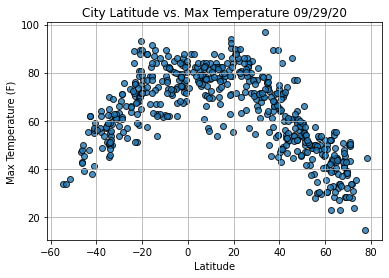

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

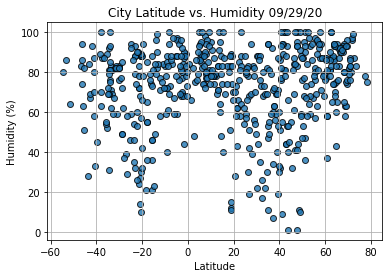

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

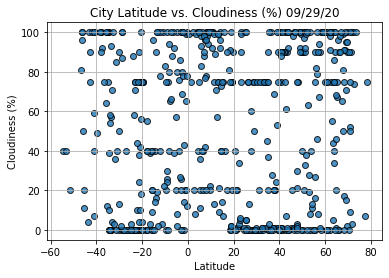

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()